<a href="https://colab.research.google.com/github/NEFTACAMFIG/Proyecto-4.-Data-Visualization/blob/main/Project_Visualization.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#!pip install jupyter-dash

In [ ]:
!pip install geopandas
!pip install contextily

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 1.0 MB 4.9 MB/s 
     |████████████████████████████████| 6.3 MB 45.0 MB/s 
     |████████████████████████████████| 16.7 MB 5.1 MB/s 
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 55 kB 2.4 MB/s 
     |████████████████████████████████| 19.3 MB 87 kB/s 


In [ ]:
#CORRER ESTA LINEA DE CODIGO
from google.colab import drive
import numpy as np
import pandas as pd
#import dash
import plotly.express as px
import csv
from geopy.geocoders import Nominatim
import geopandas as gpd
import contextily as ctx

In [ ]:
#CORRER ESTA LINEA DE CODIGO
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
df = pd.read_csv("/content/drive/MyDrive/Colab_Notebooks/Neftali/sales_day_book.csv",encoding = "ISO-8859-1")
#df=pd.read_csv('sales_day_book.csv', encoding='cp1252')

In [ ]:
df1=df.copy()

In [ ]:
df1=df1.drop(['Type','Contact Reference','Details','Tax'],axis=1)

In [ ]:
#df1['Date'] = df1['Date'].apply(pd.to_datetime,format='%Y')
df1['Date'] = df1['Date'].astype('datetime64')

In [ ]:
#df1.set_index('Date', inplace=True)

In [ ]:
df1['Ref'] = df1['Ref'].str.upper()

In [ ]:
comparison_column = np.where(df1["Net"] == df1["Total"], True, False)

In [ ]:
df1['Net & Total'] = df1['Net']

In [ ]:
df1=df1.drop(['Net','Total'],axis=1)

In [ ]:
df1['Net & Total']=df1['Net & Total'].str.replace(',','')

In [ ]:
df1['Net & Total']=df1['Net & Total'].astype('float')

In [ ]:
df1.head(4)

In [ ]:
df1.columns=["TRX","DATE","ENTERPRISE","INVOICE NUMBER","CUSTOMER","TOTAL $"]

In [ ]:
coord=df1['CUSTOMER']

In [ ]:
geolocalizador = Nominatim(user_agent="specify_your_app_name_here",timeout=3)

In [ ]:
lat=[]
lon=[]
for i in range(len(coord)):
  try:
    Resultado=geolocalizador.geocode(coord[i])
    #print(Resultado.latitude,Resultado.longitude)
    lat.append(Resultado.latitude)
    lon.append(Resultado.longitude)
  except (SyntaxError,AttributeError):
    a=0
    b=0
    lat.append(a)
    lon.append(b)

In [ ]:
df1['longitud']=lon
df1['latitud']=lat

In [ ]:
filtro = df1['latitud'] != 0.0
df2=df1[filtro]

In [ ]:
df2.head(5)

In [ ]:
# CORRER ESTA LINEA DE CODIGO
#Arellano URL
#points_city=pd.read_csv('/content/drive/MyDrive/Mis Documentos/Curso de Python/PROYECTOS/Proyecto Data Visualization/points_city.csv')
points_city=pd.read_csv('/content/drive/MyDrive/Mis Documentos/Curso de Python/PROYECTOS/Proyecto Data Visualization/points_city.csv')
#Nefta URL
#points_geoframe=pd.read_csv('')

In [ ]:
# CORRER ESTA LINEA DE CODIGO
points_city = gpd.GeoDataFrame(
    points_city, geometry=gpd.points_from_xy(points_city.Longitud, points_city.Latitud))

In [ ]:
# CORRER ESTA LINEA DE CODIGO
points_geoframe = points_city.set_crs('epsg:4326')

In [ ]:
ax = points_geoframe.to_crs('EPSG:4326').plot(color="red",
                                    edgecolor="black",
                                    markersize=50, 
                                    figsize=(9, 9))
ax.set_title('Campos Figueroa')
cx.add_basemap(ax,crs=points_geoframe.crs,source=ctx.providers.OpenStreetMap.Mapnik)

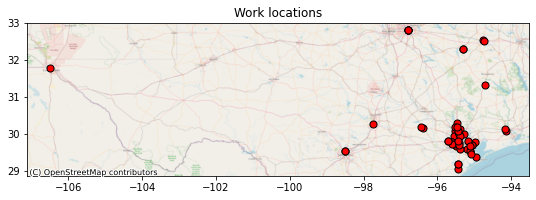

In [ ]:
ax = points_geoframe.to_crs('EPSG:4326').plot(color="red",
                                    edgecolor="black",
                                    markersize=50, 
                                    figsize=(9, 9))
ax.set_title('Work locations')
ctx.add_basemap(ax,crs=points_geoframe.crs,source=ctx.providers.OpenStreetMap.Mapnik)

# Neftali


# 2. Datos de los trabajadores y horas trabajadas


Objetivo: Encontrar una correlación entre las horas trabajadas y el salario obtenido para encontrar un promedio ideal en el que las horas trabajadas correspondan al mayor rendimiento que se pueda obtener por un trabajador

In [ ]:
#Para leer los datos desde Drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
#Importamos los datos que vamos a utilizar
#Arellano
df_workers = pd.read_csv("/content/drive/MyDrive/Colab_Notebooks/Neftali/Workers_JMA1.csv", encoding = "ISO-8859-1")
#Nef
#df_workers = pd.read_csv("/content/drive/MyDrive/Mis Documentos/Curso de Python/PROYECTOS/Proyecto Data Visualization/60f2e03b7355457f84f3354197ed17ce_general_ledger_detail_accrual_20220925_195138507.csv",encoding = "ISO-8859-1")

In [ ]:
df_workers.head(100)

In [ ]:
#Eliminamos columnas que no seran utilizadas
df_workers = df_workers.drop(['Invoice Number','Type','Credit','Running Total'],axis = 1)


In [ ]:
#Eliminamos las filas que no seran utilizadas
#df_workers = df_workers.drop([0,26,27,88],axis=0)
#df_workers.head(100)
df_workers = df_workers.drop([121,122],axis=0)

In [ ]:
#Cambiando nombre de las columnas
df_workers.columns
df_workers.columns = ['ID','Date','Worker','Reference','Time Pay','Quantity Pay']

In [ ]:
#Cambiando datos "Weekly pay" por 45 HRS
df_workers = df_workers.replace(to_replace=['WEEKLY PAY ','WEEKLY PAY','PAY DAY','PAY DAY '], value='45 HRS')

In [ ]:
df_workers.head(100)

In [ ]:
#Este codigo se utiliza para limpiar algunos datos especificos que quedan aun despues de los primeros procesos
#df_workers.loc[df_workers['ID'] == 4222,'Time Pay'] = '59 HRS'
df_workers.loc[df_workers['ID'] == 3900,'Time Pay'] = '45 HRS'
df_workers.loc[df_workers['ID'] == 4631,'Time Pay'] = '59 HRS'
df_workers.loc[df_workers['ID'] == 4632,'Time Pay'] = '35 HRS'
df_workers.head(100)

In [ ]:
#Este frgamento del codigo se utiliza para eliminar los caracteres que no son digitos en la columna de Time Pay ya que esta columna se utilizara 
#como entero y no como string
#column = ['Time Pay']
#df_workers[column] = df_workers[column].replace({' HRS':''},regex=True)
#df_workers[column] = df_workers[column].replace({' PAY':''},regex=True)
#df_workers[column] = df_workers[column].replace({' hrs pay':''},regex=True)
#df_workers[column] = df_workers[column].replace({'ROLL':''},regex=True)
#df_workers[column] = df_workers[column].replace({' HOURS':''},regex=True)
#df_workers[column] = df_workers[column].replace({' Hrs Pay':''},regex=True)
#df_workers[column] = df_workers[column].replace({' ':''},regex=True)
df_workers.head(200)

In [ ]:
#Cambiando tipo de datos en la columna "Time Pay" y "Date"
df_workers['Date'] = df_workers['Date'].astype('datetime64')
df_workers['Time Pay'] = df_workers['Time Pay'].astype('float')
df_workers.dtypes

In [ ]:
 #Se guarda el Dataset limpio
df_workers.to_csv('/content/drive/MyDrive/Mis Documentos/Workers_JMA1.csv', index=False)
#!cp data.csv '/content/drive/MyDrive/Mis Documentos'

In [ ]:
#CORRER ESTA LINEA DE CODIGO
#workers = pd.read_csv("/content/drive/MyDrive/Mis Documentos/Curso de Python/PROYECTOS/Proyecto Data Visualization/Workers_JMA1.csv", encoding = "ISO-8859-1")
#Arellano
workers = pd.read_csv("/content/drive/MyDrive/Mis Documentos/Curso de Python/PROYECTOS/Proyecto Data Visualization/Workers_JMA1.csv", encoding = "ISO-8859-1")

In [ ]:
workers.head()

In [ ]:
#CORRER ESTA LINEA DE CODIGO
df2 = workers.pivot(index = 'Date',columns = 'Worker',values = 'Time Pay')

In [ ]:
#CORRER ESTA LINEA DE CODIGO
df2 = df2.reset_index()

In [ ]:
df2

In [ ]:
#CORRER ESTA LINEA DE CODIGO
df2 = df2.fillna(method='ffill')

In [ ]:
#df2.dtypes

In [ ]:
#df2.head(100)

In [ ]:
#CORRER ESTA LINEA DE CODIGO
#Obtener las horas trabajadas por en un periodo de tiempo por trabajador

fig = px.line(df2, x='Date', y=df2.columns,
              hover_data={"Date": "|%B %d, %Y"},
              labels = {'value':'Horas trabajadas [Hrs]',
                        'Date': 'Mes de Septiembre'},
              title='Horas trabajadas durante el mes de Septiembre por Trabajador')
fig.update_xaxes(
    dtick='D1',
    tickformat="%d %B ",
    ticklabelmode="period")
fig.update_layout(title_x= 0.5)
fig.show()

In [ ]:
#CORRER ESTA LINEA DE CODIGO
workers['Quantity Pay'] = workers['Quantity Pay'].replace({',':''},regex=True)

In [ ]:
#CORRER ESTA LINEA DE CODIGO
workers['Quantity Pay'] = workers['Quantity Pay'].astype('float')

In [ ]:
#CORRER ESTA LINEA DE CODIGO
df3 = workers.groupby(['Worker']).sum()

In [ ]:
#CORRER ESTA LINEA DE CODIGO
df3 = df3.reset_index()

In [ ]:
df3

In [ ]:
figz = px.scatter(df3, x = 'Time Pay', y = 'Quantity Pay',
     color = 'Worker', size = 'Quantity Pay',
     labels = {'Quantity Pay':'Quantity Pay [USD]',
                        'Time Pay': 'Time Pay [HRS]'})
figz.update_layout(title_text = 'Relación de Horas Trabajadas y salario percibido por trabajador', title_x = 0.42)
figz.show()

# 3. Balance de gastos 2021-2022

Objetivo: Comparar los datos recabados en 2021 y 2022 para saber cuales son las areas en las que hubo un aumento de gastos. 

In [ ]:
#Cargamos los datos del balance de gastos para los años 2021 - 2022
df_2021 = pd.read_csv("/content/drive/MyDrive/Mis Documentos/Curso de Python/PROYECTOS/Proyecto Data Visualization/profit_and_loss_accrual_2021.csv")
df_2022 = pd.read_csv("/content/drive/MyDrive/Mis Documentos/Curso de Python/PROYECTOS/Proyecto Data Visualization/profit_and_loss_accrual_2022.csv")

In [ ]:
#Eliminamos columnas que no seran utilizadas
df_2021 = df_2021.drop(['Unnamed: 0','Category','Code'],axis = 1)


In [ ]:
#Eliminamos filas que no seran utilizadas
df_2021 = df_2021.drop([0,1,2,3,6,8,9,10,11,12,13,15,16],axis = 0)


In [ ]:
df_2021 = df_2021.reset_index()

In [ ]:
df_2021 = df_2021.drop(['index'],axis = 1)


,Name,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec,Totals
0,PAYROLL,NaN,NaN,"1,600.00","72,862.15","59,534.07","56,055.48","64,653.22","47,742.43","71,808.11","62,014.51","78,036.39","93,345.57","607,651.93"
1,Contractors,NaN,NaN,"12,027.00","40,236.00","56,110.00","77,297.00","90,734.00","90,492.00","85,864.00","124,462.00","90,373.34","120,807.00","788,402.34"
2,C.L.R.E,NaN,NaN,NaN,"34,760.00","35,700.00","18,850.00","15,200.00","15,400.00",NaN,"28,000.00","14,611.00","45,273.00","207,794.00"
3,Uncategorized Expense,NaN,NaN,250.00,"2,302.00","2,617.00","4,333.00",420.00,NaN,"2,382.00","3,320.00","6,080.00","4,607.00","26,311.00"


In [ ]:
df_2021 = df_2021.fillna(0)
df_2021

,Name,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec,Totals
0,PAYROLL,0.0,0.0,"1,600.00","72,862.15","59,534.07","56,055.48","64,653.22","47,742.43","71,808.11","62,014.51","78,036.39","93,345.57","607,651.93"
1,Contractors,0.0,0.0,"12,027.00","40,236.00","56,110.00","77,297.00","90,734.00","90,492.00","85,864.00","124,462.00","90,373.34","120,807.00","788,402.34"
2,C.L.R.E,0.0,0.0,0,"34,760.00","35,700.00","18,850.00","15,200.00","15,400.00",0,"28,000.00","14,611.00","45,273.00","207,794.00"
3,Uncategorized Expense,0.0,0.0,250.00,"2,302.00","2,617.00","4,333.00",420.00,0,"2,382.00","3,320.00","6,080.00","4,607.00","26,311.00"


In [ ]:
#Eliminamos columnas que no seran utilizadas
df_2022 = df_2022.drop(['Unnamed: 0','Category','Code'],axis = 1)


In [ ]:
#Eliminamos filas que no seran utilizadas
df_2022 = df_2022.drop([0,1,2,3,4,5,6,7,8,10,12,13,15,16,17,18,19,20,21,22,23,24,25,26,28,29,30,31,32],axis = 0)

In [ ]:
df_2022 = df_2022.reset_index()
df_2022 = df_2022.drop(['index'],axis = 1)

In [ ]:
df_2022 = df_2022.fillna(0)

In [ ]:
#Para comparar lapsos de tiempo similares se eliminaran las columnas en las que no se tienen datos en ambos Dataset
#df_2021 = df_2021.drop(['Jan','Feb','Oct','Nov','Dec'],axis = 1)
#df_2022 = df_2022.drop(['Jan','Feb','Oct','Nov','Dec'],axis = 1)

df_2021 = df_2021.drop(['Totals'],axis = 1)
df_2022 = df_2022.drop(['Totals'],axis = 1)

In [ ]:
for i in df_2021.columns[1:]:
  df_2021[i] = df_2021[i].replace({',':''},regex=True)

In [ ]:
for i in df_2022.columns[1:]:
  df_2022[i] = df_2022[i].replace({',':''},regex=True)

In [ ]:
for i in df_2022.columns[1:]:
  df_2021[i] = df_2021[i].astype('float')
  df_2022[i] = df_2022[i].astype('float')

In [ ]:
df_2021['Total'] = df_2021.sum(axis=1)
df_2022['Total'] = df_2022.sum(axis=1)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning:

Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: FutureWarning:

Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.



In [ ]:
df_comparison = pd.merge(df_2021,df_2022, how = 'inner', on = 'Name')

In [ ]:
df_comparison.to_csv('/content/drive/MyDrive/Mis Documentos/Curso de Python/PROYECTOS/Proyecto Data Visualization/Balance_2021-2022.csv', index=False)

In [ ]:
df_comparison

,Name,Mar_x,Apr_x,May_x,Jun_x,Jul_x,Aug_x,Sep_x,Total_x,Mar_y,Apr_y,May_y,Jun_y,Jul_y,Aug_y,Sep_y,Total_y
0,PAYROLL,1600.0,72862.15,59534.07,56055.48,64653.22,47742.43,71808.11,374255.46,93283.5,81346.0,97661.22,116312.00,101104.00,97114.50,103167.5,689988.72
1,Contractors,12027.0,40236.00,56110.00,77297.00,90734.00,90492.00,85864.00,452760.00,42458.0,55469.0,108476.00,119297.48,116523.86,160401.00,72157.0,674782.34
2,C.L.R.E,0.0,34760.00,35700.00,18850.00,15200.00,15400.00,0.00,119910.00,0.0,0.0,155070.00,0.00,87086.00,25656.61,0.0,267812.61
3,Uncategorized Expense,250.0,2302.00,2617.00,4333.00,420.00,0.00,2382.00,12304.00,1850.0,1750.0,5850.00,2650.00,5168.00,2000.00,1500.0,20768.00


In [ ]:
#CORRER ESTA LINEA DE CODIGO
import plotly.graph_objects as go
import plotly.figure_factory as ff

In [ ]:
#CORRER ESTA LINEA DE CODIGO
#df_comparison = pd.read_csv("/content/drive/MyDrive/Mis Documentos/Curso de Python/PROYECTOS/Proyecto Data Visualization/Balance_2021-2022.csv")
#Arellano
df_comparison = pd.read_csv("/content/drive/MyDrive/Mis Documentos/Curso de Python/PROYECTOS/Proyecto Data Visualization/Balance_2021-2022.csv")

In [ ]:
df_comparison

In [ ]:
#CORRER ESTA LINEA DE CODIGO
fig2 = go.Figure()

trace1 = go.Bar(x=df_comparison['Name'], y=df_comparison['Total_x'], xaxis='x2', yaxis='y2',
                marker=dict(color='#20912b'),
                name='Gastos 2021',text=df_comparison['Total_x'])
trace2 = go.Bar(x=df_comparison['Name'], y=df_comparison['Total_y'], xaxis='x2', yaxis='y2',
                marker=dict(color='#404040'),
                name='Gastos 2022',text=df_comparison['Total_y'])

fig2.add_traces([trace1, trace2])

# initialize xaxis2 and yaxis2
fig2['layout']['xaxis2'] = {}
fig2['layout']['yaxis2'] = {}


# The graph's yaxis2 MUST BE anchored to the graph's xaxis2 and vice versa
fig2.layout.yaxis2.update({'anchor': 'x2'})
fig2.layout.xaxis2.update({'anchor': 'y2'})
fig2.layout.yaxis2.update({'title': 'Gastos [USD]'})

# Update the margins to add a title and see graph x-labels.
fig2.layout.margin.update({'t':75, 'l':50})
fig2.layout.update({'title': 'Comparación de gastos 2021-2022'},title_x = 0.42)

# Update the height because adding a graph vertically will interact with
# the plot height calculated for the table
fig2.layout.update({'height':400})

# Plot!
fig2.show()

In [ ]:
from plotly.subplots import make_subplots
import plotly.graph_objects as go


In [ ]:
fig3 = make_subplots(rows=3, cols=3, shared_yaxes=True, subplot_titles=("March", "April", "May", "June", "July", "August", "September"))

fig3.add_trace(go.Bar(x=df_comparison['Name'], y=df_comparison['Mar_x'],marker=dict(color='#20912b'),name='2021'),1, 1)
fig3.add_trace(go.Bar(x=df_comparison['Name'], y=df_comparison['Mar_y'],marker=dict(color='#404040'),name='2022'),1, 1)

fig3.add_trace(go.Bar(x=df_comparison['Name'], y=df_comparison['Apr_x'],marker=dict(color='#20912b'),name='2021'),1, 2)
fig3.add_trace(go.Bar(x=df_comparison['Name'], y=df_comparison['Apr_y'],marker=dict(color='#404040'),name='2022'),1, 2)

fig3.add_trace(go.Bar(x=df_comparison['Name'], y=df_comparison['May_x'],marker=dict(color='#20912b'),name='2021'),1, 3)
fig3.add_trace(go.Bar(x=df_comparison['Name'], y=df_comparison['May_y'],marker=dict(color='#404040'),name='2022'),1, 3)

fig3.add_trace(go.Bar(x=df_comparison['Name'], y=df_comparison['Jun_x'],marker=dict(color='#20912b'),name='2021'),2, 1)
fig3.add_trace(go.Bar(x=df_comparison['Name'], y=df_comparison['Jun_y'],marker=dict(color='#404040'),name='2022'),2, 1)

fig3.add_trace(go.Bar(x=df_comparison['Name'], y=df_comparison['Jul_x'],marker=dict(color='#20912b'),name='2021'),2, 2)
fig3.add_trace(go.Bar(x=df_comparison['Name'], y=df_comparison['Jul_y'],marker=dict(color='#404040'),name='2022'),2, 2)

fig3.add_trace(go.Bar(x=df_comparison['Name'], y=df_comparison['Aug_x'],marker=dict(color='#20912b'),name='2021'),2, 3)
fig3.add_trace(go.Bar(x=df_comparison['Name'], y=df_comparison['Aug_y'],marker=dict(color='#404040'),name='2022'),2, 3)

fig3.add_trace(go.Bar(x=df_comparison['Name'], y=df_comparison['Sep_x'],marker=dict(color='#20912b'),name='2021'),3, 1)
fig3.add_trace(go.Bar(x=df_comparison['Name'], y=df_comparison['Sep_y'],marker=dict(color='#404040'),name='2022'),3, 1)

fig3.update_yaxes(title_text="Cashflow Out [USD]", row=1, col=1)
fig3.update_yaxes(title_text="Cashflow Out [USD]", row=1, col=2)
fig3.update_yaxes(title_text="Cashflow Out [USD]", row=1, col=3)
fig3.update_yaxes(title_text="Cashflow Out [USD]", row=2, col=1)
fig3.update_yaxes(title_text="Cashflow Out [USD]", row=2, col=2)
fig3.update_yaxes(title_text="Cashflow Out [USD]", row=2, col=3)
fig3.update_yaxes(title_text="Cashflow Out [USD]", row=3, col=1)

fig3.update_layout(height=1200, width=1400)
fig3.show()

# 3.1 Proporcion de gastos en 2022

In [ ]:

df_2022 = pd.read_csv("/content/drive/MyDrive/Mis Documentos/Curso de Python/PROYECTOS/Proyecto Data Visualization/profit_and_loss_accrual_2022.csv")

In [ ]:

df_E2022 = df_2022.drop(['Unnamed: 0','Category','Code','Oct','Nov','Dec'],axis = 1)

In [ ]:

df_E2022 = df_E2022.drop([0,13,19,],axis=0)

In [ ]:

df_E2022 = df_E2022.reset_index()
df_E2022 = df_E2022.drop(['index'],axis = 1)

df_E2022 = df_E2022.fillna(0)

In [ ]:

for i in df_E2022.columns[1:]:
  df_E2022[i] = df_E2022[i].replace({',':''},regex=True)

for i in df_E2022.columns[1:]:
  df_E2022[i] = df_E2022[i].astype('float')

In [ ]:
df_E2022.to_csv('/content/drive/MyDrive/Mis Documentos/Curso de Python/PROYECTOS/Proyecto Data Visualization/Expenses_2022.csv', index=False)

In [ ]:
#CORRER ESTA LINEA DE CODIGO
#df_E2022 = pd.read_csv("/content/drive/MyDrive/Mis Documentos/Curso de Python/PROYECTOS/Proyecto Data Visualization/Expenses_2022.csv")
#Arellano
df_E2022 = pd.read_csv("/content/drive/MyDrive/Mis Documentos/Curso de Python/PROYECTOS/Proyecto Data Visualization/Expenses_2022.csv")


In [ ]:
df_E2022

In [ ]:
#CORRER ESTA LINEA DE CODIGO
import plotly.express as px
fig4 = px.pie(df_E2022, values='Totals', names='Name',
             labels={'Name':'Categoria','Totals':'Gasto[USD]'})
fig4.update_traces(textposition='inside',textinfo='percent+label')
fig4.show()

#title='Proporción de Gastos año 2022',

In [ ]:
labels = [df_E2022['Name']]

fig5 = make_subplots(rows=3, cols=3, shared_yaxes=True, subplot_titles=("January", "February","March","April","May","June","July","August","September")
,specs=[[{"type": "pie"},{"type": "pie"},{"type": "pie"}],
        [{"type": "pie"},{"type": "pie"},{"type": "pie"}],
        [{"type": "pie"},{"type": "pie"},{"type": "pie"}]])

fig5.add_trace(go.Pie(values=df_E2022['Jan'],labels=df_E2022['Name'],name="Categoria"),1, 1)
fig5.add_trace(go.Pie(values=df_E2022['Feb'],labels=df_E2022['Name'],name="Categoria"),1, 2)
fig5.add_trace(go.Pie(values=df_E2022['Mar'],labels=df_E2022['Name'],name="Categoria"),1, 3)
fig5.add_trace(go.Pie(values=df_E2022['Apr'],labels=df_E2022['Name'],name="Categoria"),2, 1)
fig5.add_trace(go.Pie(values=df_E2022['May'],labels=df_E2022['Name'],name="Categoria"),2, 2)
fig5.add_trace(go.Pie(values=df_E2022['Jun'],labels=df_E2022['Name'],name="Categoria"),2, 3)
fig5.add_trace(go.Pie(values=df_E2022['Jul'],labels=df_E2022['Name'],name="Categoria"),3, 1)
fig5.add_trace(go.Pie(values=df_E2022['Aug'],labels=df_E2022['Name'],name="Categoria"),3, 2)
fig5.add_trace(go.Pie(values=df_E2022['Sep'],labels=df_E2022['Name'],name="Categoria"),3, 3)

fig5.update_traces(textposition='inside',textinfo='percent+label')


fig5.update_layout(height=1200, width=1200)
fig5.show()

# 4. Contratistas

In [ ]:
#CORRER ESTA LINEA DE CODIGO
#Se leen los datos que se van a analizar
#df_Contractors = pd.read_csv("/content/drive/MyDrive/Mis Documentos/Curso de Python/PROYECTOS/Proyecto Data Visualization/Contratistas.csv")
#Arellano
df_Contractors = pd.read_csv("/content/drive/MyDrive/Mis Documentos/Curso de Python/PROYECTOS/Proyecto Data Visualization/Contratistas.csv")


In [ ]:
#CORRER ESTA LINEA DE CODIGO
df_Contractors = df_Contractors.drop(['Invoice Number','Type','Reference','Credit','Running Total'],axis = 1)
df_Contractors = df_Contractors.drop([0,26,27],axis=0)

In [ ]:
#CORRER ESTA LINEA DE CODIGO
df_Contractors = df_Contractors.reset_index()
df_Contractors = df_Contractors.drop(['index'],axis = 1)

In [ ]:
#CORRER ESTA LINEA DE CODIGO
df_Contractors['Debit'] = df_Contractors['Debit'].replace({',':''},regex=True)

df_Contractors['Debit'] = df_Contractors['Debit'].astype('float')

In [ ]:
df_Contractors.to_csv('/content/drive/MyDrive/Mis Documentos/Curso de Python/PROYECTOS/Proyecto Data Visualization/Contractors_2022.csv', index=False)

In [ ]:
df_Contractors

In [ ]:
#CORRER ESTA LINEA DE CODIGO
import plotly.express as px
fig6 = px.bar(df_Contractors, x="Debit", y="Name", color='Description',labels=dict(Debit="Budget ($)", Name="Contractor", Description="Project"),
              orientation='h',
             hover_data=["Description", "Debit"],
             height=500,
              )

fig6.update_layout(title_x=0.41,)

fig6.show()

# DASH

In [ ]:
#CORRER ESTA LINEA DE CODIGO
!pip install jupyter-dash

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 9.8 MB 6.8 MB/s 
     |████████████████████████████████| 357 kB 67.9 MB/s 
     |████████████████████████████████| 1.6 MB 46.8 MB/s 
  Created wheel for retrying: filename=retrying-1.3.3-py3-none-any.whl size=11447 sha256=176d3d3eb325cecb0b91c7dce26344914bf6b0592ef8dd7d7097393aa8b6d01f
  Stored in directory: /root/.cache/pip/wheels/f9/8d/8d/f6af3f7f9eea3553bc2fe6d53e4b287dad18b06a861ac56ddf
Successfully built retrying


In [ ]:
#CORRER ESTA LINEA DE CODIGO
from jupyter_dash import JupyterDash # Versión de dash para notebooks
from dash import dcc # Componentes HTML preconstruidos para dashboards
from dash import html # Componentes HTML nativos
from dash.dependencies import Input, Output # Clases Input y Output
import plotly.express as px # Generar gráficas e importar datasets con Plotly
from dash.exceptions import PreventUpdate
import pandas as pd # Recolección y manipulación de datos
import dash

In [ ]:
#CORRER ESTA LINEA DE CODIGO
# Importamos una hoja de estilos externa
external_stylesheets = ['https://codepen.io/chriddyp/pen/bWLwgP.css']
#external_stylesheets = ['style/mihoja.css'] # Cascade Style Sheets

# python file.py
app = JupyterDash(__name__, external_stylesheets=external_stylesheets)

colors = {
    'background': '#111111',
    'text': '#95c98f'
}

fig80 = px.scatter_mapbox(points_city, lat='Latitud' ,lon='Longitud',
                        color='Cities',mapbox_style='open-street-map',
                        zoom=5 ,
                        center=({'lat':31.47425664311308,'lon':-99.05948478502832}),
                        text='CUSTOMER',width=1365,height=550,
                        )


fig80.update_layout(clickmode='event+select',
    plot_bgcolor=colors['background'],
    paper_bgcolor=colors['background'],
    font_color=colors['text'])
fig80.update_traces(marker_size=15)



fig2.update_layout(
    plot_bgcolor=colors['background'],
    paper_bgcolor=colors['background'],
    font_color=colors['text']
)

fig6.update_layout(
    plot_bgcolor=colors['background'],
    paper_bgcolor=colors['background'],
    font_color=colors['text']
)

fig4.update_layout(
    plot_bgcolor=colors['background'],
    paper_bgcolor=colors['background'],
    font_color=colors['text']
)








app.layout =html.Div(style={'backgroundColor': colors['background']}, children=[
    html.H1(children='Data Center',style={
            'textAlign': 'center',
            'color': colors['text']}),

             html.Div(style={'backgroundColor': colors['background']}, children=[
                   html.H3(children = 'Relationship of Hours Worked and salary received per worker',style={
                                     'textAlign': 'center',
                                     'color': colors['text']}),
                   dcc.Graph(id='grafica_x'),
                   dcc.Dropdown(id = 'multiple_callbacks', options = [x for x in df3['Worker']], value = [x for x in df3['Worker']], multi=True,style = {'color':'#111111',
                                                              'background': '#111111',
                                                              'font-size': 16}),]),

            html.Div(style={'backgroundColor': colors['background']},children=[
                    html.H3(children='Hours worked during the month of September per Employee',style={
                                     'textAlign': 'center',
                                     'color': colors['text']}),
                    dcc.Dropdown(df2.columns[1:].unique(),value = 'ABACUC FIGUEROA', style = {'color':'#111111',
                                                              'background': '#95c98f',
                                                              'font-size': 18},
                                                               id = 'change_worker'),
                    dcc.Graph(id='graph_worker')]),
                                                                                
            html.Div(style={'backgroundColor': colors['background']}, children=[
                   html.H3(children='Projects and budget assigned to contractors during September',style={
                                     'textAlign': 'center',
                                     'color': colors['text']}),
                   dcc.Graph(id='grafica_2021', figure=fig6)]),

            html.Div(style={'backgroundColor': colors['background']}, children=[
                   html.H3(children = 'Comparison between 2021 VS 2022',style={
                                     'textAlign': 'center',
                                     'color': colors['text']}),
                   html.Button('Overview Comparison 2021-2022', id='submit-val', style={
                                     'textAlign': 'center',
                                     'color': colors['text'],
                                     }),
                   dcc.Graph(id='grafica_2022', figure = fig2),
                   dcc.Slider(0,8, step = None, value = 1, marks = {0: '',
                                                         1:{'label':'Mar','style':{'color':'#95c98f'}},2:{'label':'Apr','style':{'color':'#95c98f'}},
                                                         3:{'label':'May','style':{'color':'#95c98f'}},4:{'label':'Jun','style':{'color':'#95c98f'}},
                                                         5:{'label':'Jul','style':{'color':'#95c98f'}},6:{'label':'Aug','style':{'color':'#95c98f'}},
                                                         7:{'label':'Sep','style':{'color':'#95c98f'}},8:''},
                                                          id = 'month_slider')]),

            
            
            html.Div([
              html.Div([
                html.Div([html.H3('Cashflow Out 2022',style = {'textAlign':'center',
                                                              'color':colors['text']}),
                          dcc.Dropdown(disabled = True, style= {'display': 'none'}),                          
                          dcc.Graph(id='g1', figure=fig4)
                         ], className="six columns"),

                html.Div([html.H4('Cashflow Out by Month',style = {'textAlign':'center',
                                                              'color':colors['text']}),
                          dcc.Dropdown(df_E2022.columns[1:].unique(), value = 'Jan', style = {'textAlign':'center',
                                                              'color':'#111111',
                                                              'background': '#95c98f',
                                                              'font-size': 18},
                                      id='xaxis-column'), 
                          dcc.Graph(id='graph-with-choose')
                         ], className="six columns"),
                       ], className="row")
                      ]),


              html.Div(style={'backgroundColor': colors['background']},children=[
                    html.H3(children='Work locations',style={
                                     'textAlign': 'center',
                                     'color': colors['text']}),  
                    dcc.Graph(id='Map',figure=fig80 )])

            ])

@app.callback(
    Output('graph-with-choose', 'figure'),
    Input('xaxis-column', 'value'))

def update_figure(selected_month):

  fig = go.Figure(data=[go.Pie(values=df_E2022[selected_month],labels=df_E2022['Name'],name="Categoria")])
  fig.update_traces(textposition='inside',textinfo='percent+label')
  fig.update_layout(
    plot_bgcolor=colors['background'],
    paper_bgcolor=colors['background'],
    font_color=colors['text'],
    )
 
  fig.show()
  
  return fig

@app.callback(
    Output('graph_worker', 'figure'),
    Input('change_worker', 'value'))

def update_worker(selected_worker):

  figx = px.line(df2, x='Date', y=df2[selected_worker],
              hover_data={"Date": "|%B %d, %Y"},
              labels = {'value':'Worked Hours [Hrs]',
                        'Date': 'SEPTEMBER'})
              
  figx.update_xaxes(
    dtick='D1',
    tickformat="%d %B ",
    ticklabelmode="period")
  
  figx.update_traces(line_color="#f5f502")
  
  figx.update_layout(title_x= 0.5, plot_bgcolor=colors['background'],
    paper_bgcolor=colors['background'],
    font_color=colors['text'])
  figx.show()
  
  return figx

@app.callback(
    Output('grafica_2022', 'figure'),
    Input('month_slider', 'value'),
    Input('submit-val','n_clicks'))

def month_2022(month_slider,n_clicks):
  months = {0:'Mar', 1:'Mar', 2:'Apr', 3:'May', 4:'Jun', 5:'Jul', 6:'Aug', 7:'Sep', 8:'Sep'}
  months2 = {0:'MARCH', 1:'MARCH', 2:'APRIL', 3:'MAY', 4:'JUNE', 5:'JULY', 6:'AUGUST', 7:'SEPTEMBER', 8:'SEPTEMBER'}

  f = str(months2[month_slider])

  changed_id = [p['prop_id'] for p in dash.callback_context.triggered][0]

  if 'submit-val' in changed_id:
    return fig2

  else:
  
    figy = go.Figure()

    trace1 = go.Bar(x=df_comparison['Name'], y=df_comparison[months[month_slider]+'_'+'x'], xaxis='x2', yaxis='y2',
                marker=dict(color='#20912b'),
                name='Gastos 2021',text=df_comparison[months[month_slider]+'_'+'x'])
    trace2 = go.Bar(x=df_comparison['Name'], y=df_comparison[months[month_slider]+'_'+'y'], xaxis='x2', yaxis='y2',
                marker=dict(color='#404040'),
                name='Gastos 2022',text=df_comparison[months[month_slider]+'_'+'y'])

    figy.add_traces([trace1, trace2])

    figy['layout']['xaxis2'] = {}
    figy['layout']['yaxis2'] = {}

    figy.layout.yaxis2.update({'anchor': 'x2'})
    figy.layout.xaxis2.update({'anchor': 'y2'})
    figy.layout.yaxis2.update({'title': 'Cashflow Out [USD]'})

    figy.layout.margin.update({'t':75, 'l':50})
    figy.layout.update({'title': 'Cashflow Out Comparison' + ' ' + f + ' ' +  '2021-2022'},title_x = 0.42)

    figy.layout.update({'height':400},plot_bgcolor=colors['background'],
        paper_bgcolor=colors['background'],
        font_color=colors['text'])

    figy.show()

    return figy

@app.callback(
    Output('grafica_x', 'figure'),
    Input('multiple_callbacks', 'value'))

def month_2022(multiple_callbacks):
  if len(multiple_callbacks) == 0:
    return dash.no_update
  else:
    df33 = df3[df3.Worker.isin(multiple_callbacks)]
    figza = px.scatter(df33, x = 'Time Pay', y = 'Quantity Pay',
     color = 'Worker', size = 'Quantity Pay',
     labels = {'Quantity Pay':'Quantity Pay [USD]',
                        'Time Pay': 'Time Pay [HRS]'})
    figza.update_layout(plot_bgcolor=colors['background'],
    paper_bgcolor=colors['background'],
    font_color=colors['text'])
    figza.show()

    return figza

if __name__ == '__main__':
    app.run_server(debug=True, mode='external')

Dash app running on:


<IPython.core.display.Javascript object>